### 스크레이핑, 크롤링
- Scraping: 웹 사이트의 특정 정보를 추출하는 것. 웹 데이터의 구조 분석이 필요
- 로그인이 필요한 경우가 많다
- Crawling: 프로그램이 웹사이트를 정기적으로 돌며 정보를 추출하는 것 (이러한 프로그램을 크롤러, 스파이더라고 한다)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC1-2/blob/main/gg-09-데이터크롤링.ipynb"><img src="https://github.com/swkim01/DSAC1-2/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC1-2/blob/main/gg-09-데이터크롤링.ipynb"><img src="https://github.com/swkim01/DSAC1-2/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

#### urllib 사용법
- url 관련 데이터를 처리하는 라이브러리
- http 또는 ftp를 사용해 데이터를 다운로드 받는데 사용

#### 웹에서 파일 다운로드하기

In [1]:
# 네이버 실시간 검색어
import re
import requests

re.findall('<span class="ah_k">(.*?)</span>', requests.get('http://naver.com').text)[:20]

['류현진 10승',
 '현아',
 '강형욱',
 '김창환',
 '잠원동',
 '다나',
 '이의정',
 '이재욱',
 '일본 불매운동',
 '현아 입술',
 '함태호',
 '전지희',
 '모나미',
 '진마켓반값',
 '왕산악',
 'lg건조기',
 '설채현',
 '쥬라기월드',
 '수원 중화분식',
 '트래버스 베이넌']

In [2]:
# json으로 보기
import json, requests
from pandas.io.json import json_normalize

r = requests.get('http://rank.search.naver.com/rank.js')
json_normalize(json.loads(r.text), ['data', 'data'])

,change,cvalue,delta,keyword,rank,ratio,score,tvalue
0,+,0.0,0,류현진 10승,1,.,0,0.0
1,+,0.0,0,현아,2,.,0,0.0
2,+,0.0,0,강형욱,3,.,0,0.0
3,+,0.0,0,김창환,4,.,0,0.0
4,+,0.0,0,잠원동,5,.,0,0.0
5,+,0.0,0,다나,6,.,0,0.0
6,+,0.0,0,이의정,7,.,0,0.0
7,+,0.0,0,일본 불매운동,8,.,0,0.0
8,+,0.0,0,현아 입술,9,.,0,0.0
9,+,0.0,0,함태호,10,.,0,0.0


In [3]:
import urllib.request
url = "http://uta.pw/shodou/img/28/214.png"
savename = "data/test.png"
urllib.request.urlretrieve(url, savename)

('data/test.png', <http.client.HTTPMessage at 0x8dd8518>)

#### urlopen() 사용법
- 위의 urlretrive()는 데이터를 파일에 바로 저장하였다.
- urlopen()을 사용하면 데이터를 파이선에서 읽을 수 있다.

In [4]:
mem = urllib.request.urlopen(url).read()
with open(savename, "wb") as f:
    f.write(mem)

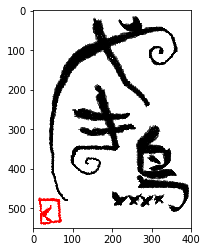

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread(savename))

#### 웹 API 이용하기
- 클라이언트정보를 보여주는 샘플 api 사이트 접속

In [6]:
url = "http://api.aoikujira.com/ip/ini"
res = urllib.request.urlopen(url)
data = res.read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)
print(data)

[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=113.198.233.65
REMOTE_HOST=113.198.233.65
REMOTE_PORT=43654
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.7
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini


b'[ip]\nAPI_URI=http://api.aoikujira.com/ip/get.php\nREMOTE_ADDR=113.198.233.65\nREMOTE_HOST=113.198.233.65\nREMOTE_PORT=43654\nHTTP_HOST=api.aoikujira.com\nHTTP_USER_AGENT=Python-urllib/3.7\nHTTP_ACCEPT_LANGUAGE=\nHTTP_ACCEPT_CHARSET=\nSERVER_PORT=80\nFORMAT=ini\n\n'


In [7]:
# 파라미터를 전송하여 데이터를 읽는 예
import urllib.parse
API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"


# 파라미터 코딩, 딕셔너리 사용, 109: 서울 경기지역
values = {
    'stdId': '109'
}

params = urllib.parse.urlencode(values)
url = API + "?" + params
print ("url=", url)
data = urllib.request.urlopen(url).read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)


url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2019년 07월 05일 (금)요일 06:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2019년 07월 05일 (금)요일 06:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>201907050600</tm>
		<wf><![CDATA[동풍의 영향으로 8일 오전은 강원영동에 비가 오겠고, 장마전선의 영향으로 10~11일은 전국에, 14일은 제주도에 비가 오겠습니다.  <br />그 밖의 날은 고기압 가장자리에 들어 구름많은 날이 많겠습니다.<br />기온은 평년(최저기온: 18~23℃, 최고기온: 25~30℃)과 비슷하겠으나, 전반에 서쪽지방을 중심으로 낮기온이 평년보다 높겠습니다.<br />강수량은 평년(5~20mm)과 비슷하거나 많겠습니다.<br /><br />* 한편, 장마전선은 제주도남쪽해상에 머물다 10~11일 북상하여 전국에 영향을 주겠고

####  GET  요청을 사용하여 파라미터를 보내는 경우
- URL 끝 부분에 ?를 입력하고 key = value 형식으로 매개변수를 추가한다. 여러개의 파라미터를 넣는 경우 &를 사용하여 구분한다
- 한글 등이 파라미터로 사용될 때는 반드시 이러한 코딩을 해주어야 한다

#### 키보드에서 파라미터를 입력받는 방법

In [8]:
import sys
import urllib.parse as parse
import urllib.request as req

# 명령어를 사용하는 경우 사용법 python3 forecast.py 108
# if len(sys.argv) <= 1:
#     print("python3 forecast.py 지역번호")
#     sys.exit()  
# regionNumber = sys.argv[1]

regionNumber = input()

API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

values = {
    'stdId': regionNumber
}

params = parse.urlencode(values)
url = API + "?" + params
print ("url=", url)
data = req.urlopen(url).read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)


108
url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=108
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2019년 07월 05일 (금)요일 06:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2019년 07월 05일 (금)요일 06:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>201907050600</tm>
		<wf><![CDATA[동풍의 영향으로 8일 오전은 강원영동에 비가 오겠고, 장마전선의 영향으로 10~11일은 전국에, 14일은 제주도에 비가 오겠습니다.  <br />그 밖의 날은 고기압 가장자리에 들어 구름많은 날이 많겠습니다.<br />기온은 평년(최저기온: 18~23℃, 최고기온: 25~30℃)과 비슷하겠으나, 전반에 서쪽지방을 중심으로 낮기온이 평년보다 높겠습니다.<br />강수량은 평년(5~20mm)과 비슷하거나 많겠습니다.<br /><br />* 한편, 장마전선은 제주도남쪽해상에 머물다 10~11일 북상하여 전국에 영향을